In [ ]:
from rouge_score import rouge_scorer
import numpy as np
import pandas
import matplotlib.pyplot as plt


In [1]:
## score texts

#number of inputs
maxDepth=5 #depth
maxit=10 #text iterations of the same depth and article to average scores

#setup scorer, rouge scorer performs tokenization and works with multiple sentences
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

#list of articles and class assignement
articles= ['The_Beatles','Led_Zeppelin','The_Rolling_Stones','Black_Sabbath','Fluorine','Chlorine','Bromine','Iodine']
classes={'The_Beatles':'Rock groups','Led_Zeppelin':'Rock groups','The_Rolling_Stones':'Rock groups','Black_Sabbath':'Rock groups',
         'Fluorine':'Halogens','Chlorine':'Halogens','Bromine':'Halogens','Iodine':'Halogens'}
data=[]

#score texts
for article in articles:           
    for dep in range(1,maxDepth+1):
        av_scores=np.zeros(maxit)
        for it in range(maxit):
            #load text
            refpath = './data/output/'+article+'_ref.txt'
            hyppath= './data/output/'+article+'_Depth_'+str(dep)+'_'+str(it)+'.txt'
            hypfile = open(hyppath, "r",encoding='utf-8')
            reffile= open(refpath, "r",encoding='utf-8')
            #replace \n characters
            hyp=hypfile.read().replace("\n", " ")
            hypfile.close()
            ref=reffile.read().replace("\n", " ")
            reffile.close()

            #score text
            scores = scorer.score(ref,hyp)
            #save in data
            #f measure of rouge 1,2,L
            data.append([classes[article],article,dep,it,scores['rouge1'][2],scores['rouge2'][2],scores['rougeL'][2]])

#create dataframe of scores
df=pandas.DataFrame(data,columns=['Domain','article','Depth','iteration','score rouge1','score rouge2','score rougeL'])
print(df)
        
    

          Domain      article  Depth  iteration  score rouge1  score rouge2  \
0    Rock groups  The_Beatles      1          0      0.274510      0.068796   
1    Rock groups  The_Beatles      1          1      0.247219      0.047088   
2    Rock groups  The_Beatles      1          2      0.244444      0.047030   
3    Rock groups  The_Beatles      1          3      0.249691      0.029740   
4    Rock groups  The_Beatles      1          4      0.270603      0.054254   
..           ...          ...    ...        ...           ...           ...   
395     Halogens       Iodine      5          5      0.310413      0.039448   
396     Halogens       Iodine      5          6      0.312373      0.024440   
397     Halogens       Iodine      5          7      0.304348      0.051587   
398     Halogens       Iodine      5          8      0.302789      0.048000   
399     Halogens       Iodine      5          9      0.325397      0.039841   

     score rougeL  
0        0.149510  
1        0.

Text(0.5, 0.98, '')

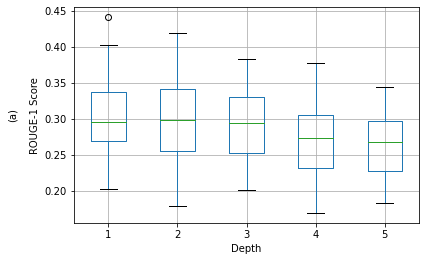

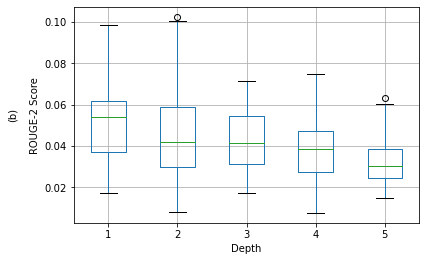

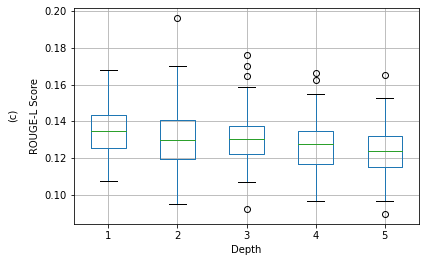

In [2]:
## box plots

ax1=df.boxplot('score rouge1','Depth')
ax1.set_ylabel('(a)\n\nROUGE-1 Score')
ax1.set_title('')
plt.suptitle('')

ax2=df.boxplot('score rouge2','Depth')
ax2.set_ylabel('(b)\n\nROUGE-2 Score')
ax2.set_title('')
plt.suptitle('')

ax3=df.boxplot('score rougeL','Depth')
ax3.set_ylabel('(c)\n\nROUGE-L Score')
ax3.set_title('')
plt.suptitle('')


                   score rouge1  score rouge2  score rougeL
Depth Domain                                               
1     Halogens         0.311136      0.052550      0.138634
      Rock groups      0.295773      0.052970      0.131614
2     Halogens         0.310566      0.047066      0.138596
      Rock groups      0.280582      0.041502      0.123741
3     Halogens         0.296722      0.041499      0.135877
      Rock groups      0.290547      0.043447      0.126044
4     Halogens         0.274324      0.036618      0.129942
      Rock groups      0.273333      0.039962      0.123376
5     Halogens         0.265332      0.031364      0.127915
      Rock groups      0.260825      0.032466      0.119973


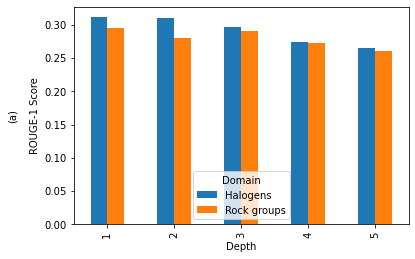

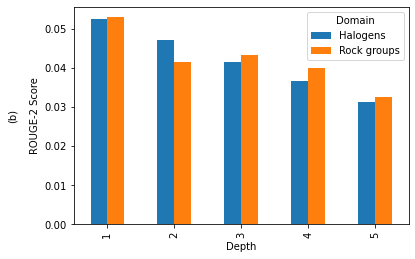

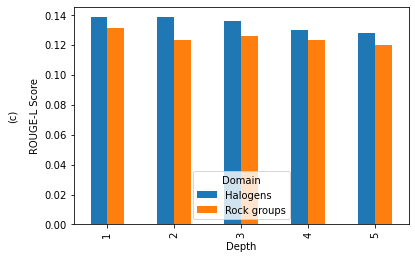

In [3]:
## bar plots

dfav=df.groupby(['Depth','Domain']).mean().drop('iteration',axis=1)
dfav['score rouge1'].unstack().plot.bar(ylabel='(a)\n\nROUGE-1 Score')

dfav['score rouge2'].unstack().plot.bar(ylabel='(b)\n\nROUGE-2 Score')
dfav['score rougeL'].unstack().plot.bar(ylabel='(c)\n\nROUGE-L Score')

print(dfav)
#dfav.plot(y='score rouge1',x='Depth')